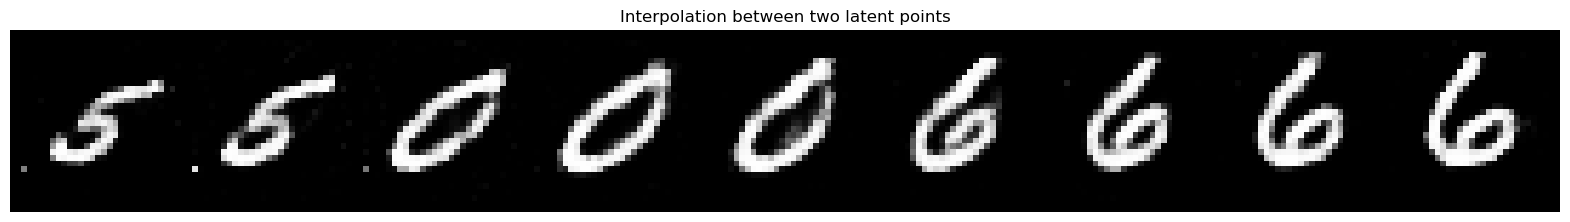

In [44]:
import torch
# import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from my_gan import Generator

# Function to load the pre-trained Generator model
def load_generator(filepath, latent_dim, device):
    generator = Generator(latent_dim).to(device)
    generator.load_state_dict(torch.load(filepath, map_location=device))
    generator.eval()
    return generator

# Function to generate a single image from a random latent vector
def generate_single_image(generator, latent_dim, device):
    z = torch.randn(1, latent_dim).to(device)
    with torch.no_grad():
        img = generator(z).detach().cpu()
    return img, z

# Function to interpolate between two latent vectors
def interpolate_images(generator, z1, z2, steps, device):
    z_interp = torch.zeros((steps + 2, z1.size(1))).to(device)
    for i in range(steps + 2):
        alpha = i / (steps + 1)
        z_interp[i] = (1 - alpha) * z1 + alpha * z2

    with torch.no_grad():
        interpolated_images = generator(z_interp).cpu()

    return interpolated_images

# Function to plot images
def plot_images(images, title):
    grid = make_grid(images, nrow=9, normalize=True, value_range=(-1, 1))
    plt.figure(figsize=(20, 20))
    plt.imshow(grid.permute(1, 2, 0).numpy())
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the generator model
latent_dim = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
generator = load_generator('mnist_generator.pt', latent_dim, device)

# Generate two images and their latent vectors
img1, z1 = generate_single_image(generator, latent_dim, device)
img2, z2 = generate_single_image(generator, latent_dim, device)

# Check if the images are from different classes (requires a classifier, so assuming random for now)
# Ideally, use a classifier to ensure img1 and img2 are from different classes

# Interpolate between the two latent vectors
interpolated_images = interpolate_images(generator, z1, z2, 7, device)

# Plot the interpolated images
plot_images(interpolated_images, "Interpolation between two latent points")
#Sample 2 images from your GAN (make sure that they are of different classes). Interpolate between these two digits
#in latent space and include the results in your jupyter notebook. Use 7 interpolation steps, resulting in 9 images
#(including start and end point)

import torchvision
#加载模型与生成图片

# import torch
# import torchvision.transforms as transforms
# import matplotlib.pyplot as plt
# from my_gan import Generator
# # Load models
# latent_dim = 100
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# G = Generator(latent_dim).to(device)
# G.load_state_dict(torch.load('mnist_generator.pt'))
# G.eval()

